In [119]:
import os
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
msh = pd.read_csv('Mass Shootings Dataset Ver 5.csv', encoding='latin1')



In [120]:
display(msh.head())

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


In [121]:
print(msh.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S#                    323 non-null    int64  
 1   Title                 323 non-null    object 
 2   Location              278 non-null    object 
 3   Date                  323 non-null    object 
 4   Incident Area         261 non-null    object 
 5   Open/Close Location   295 non-null    object 
 6   Target                318 non-null    object 
 7   Cause                 246 non-null    object 
 8   Summary               323 non-null    object 
 9   Fatalities            323 non-null    int64  
 10  Injured               323 non-null    int64  
 11  Total victims         323 non-null    int64  
 12  Policeman Killed      317 non-null    float64
 13  Age                   179 non-null    object 
 14  Employeed (Y/N)       67 non-null     float64
 15  Employed at           4

In [122]:
msh.describe()

,S#,Fatalities,Injured,Total victims,Policeman Killed,Employeed (Y/N),Latitude,Longitude
count,323.000000,323.000000,323.000000,323.000000,317.000000,67.000000,303.000000,303.000000
mean,162.000000,4.436533,6.176471,10.263158,0.129338,0.626866,37.225076,-94.429539
std,93.386294,5.783208,29.889182,33.662309,0.610294,0.487288,5.536365,16.513296
min,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,21.325512,-161.792752
25%,81.500000,1.000000,1.000000,4.000000,0.000000,0.000000,33.571459,-110.205485
50%,162.000000,3.000000,3.000000,5.000000,0.000000,1.000000,36.443290,-88.122998
75%,242.500000,5.500000,5.000000,9.000000,0.000000,1.000000,41.483844,-81.703237
max,323.000000,59.000000,527.000000,585.000000,5.000000,1.000000,60.790539,-69.707823


In [123]:
age = msh[['Age']]
print(age)
print(type(age))
print(age.loc[253])
print(age['Age'].dtypes)


     Age
0     26
1     47
2     37
3     64
4     38
..   ...
318   14
319   23
320  NaN
321   18
322   25

[323 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
Age    13,11
Name: 253, dtype: object
object


In [124]:
age.dropna(inplace = True)

c:\users\dom\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [125]:
print(max(age['Age']))
print(min(age['Age']))

70
0


In [126]:
age = age.sort_values('Age')
print(age)

       Age
14       0
162     12
244     13
253  13,11
218     14
..     ...
300     59
171     64
3       64
241     66
174     70

[179 rows x 1 columns]


In [127]:
print(age[age['Age'].apply(type) == type('s')])

       Age
14       0
162     12
244     13
253  13,11
218     14
..     ...
300     59
171     64
3       64
241     66
174     70

[179 rows x 1 columns]


In [128]:

print(age)

       Age
14       0
162     12
244     13
253  13,11
218     14
..     ...
300     59
171     64
3       64
241     66
174     70

[179 rows x 1 columns]


In [129]:
lst_col = 'Age' 
x = age.assign(**{lst_col:age[lst_col].str.split(',')})
age = pd.DataFrame({col:np.repeat(x[col].values, x[lst_col].str.len())
            for col in x.columns.difference([lst_col])
                }).assign(**{lst_col:np.concatenate(x[lst_col].values)})[x.columns.tolist()]
age['Age'] = pd.to_numeric(age['Age'], errors=
'coerce')
age.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     184 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [130]:
age = age[age['Age'] > 5]
age

,Age
1,12
2,13
3,13
4,11
5,14
...,...
179,59
180,64
181,64
182,66


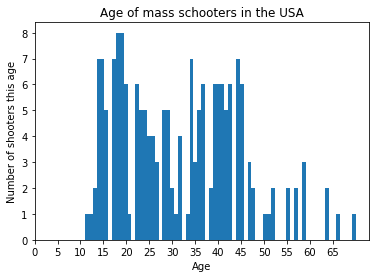

In [133]:
plt.hist(age, bins = 70)


plt.xticks(np.arange(0, 70, 5))
plt.title('Age of mass schooters in the USA')
plt.xlabel('Age')
plt.ylabel('Number of shooters this age')

plt.show()

In [40]:
pd.concat([Series(row['var2'], row['var1'].split(','))              
                    for _, row in a.iterrows()]).reset_index()

pd.concat(Series[age['kolumna'], age['Age'].split(',')
print(age)

SyntaxError: invalid syntax (<ipython-input-40-afc0a86d77e3>, line 5)

In [17]:
age.to_csv(r'C:\Users\Dom\Data Science Projects\Mass Shootings in the USA\agecsv.csv')

In [18]:
msh.loc[253]

S#                                                                    254
Title                                     Westside Middle School killings
Location                                              Jonesboro, Arkansas
Date                                                            3/24/1998
Incident Area                                                      School
Open/Close Location                                                 Close
Target                                                  Students+Teachers
Cause                                                                 NaN
Summary                 Mitchell Scott Johnson, 13, and Andrew Douglas...
Fatalities                                                              5
Injured                                                                10
Total victims                                                          15
Policeman Killed                                                        0
Age                                   

In [21]:
print(age)
print('\n')
print(age.info())
print('\n')
print(age.describe())
print('\n')
def checker(txt):
    try:
        float(txt)
        return False
    except:
        return True

two_killers = age[age['Age'].apply(checker)]
print(two_killers)
print(type(two_killers))


       Age
14       0
162     12
244     13
253  13,11
218     14
..     ...
300     59
171     64
3       64
241     66
174     70

[179 rows x 1 columns]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 14 to 174
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     179 non-null    object
dtypes: object(1)
memory usage: 2.8+ KB
None


        Age
count   179
unique   51
top      18
freq      7


       Age
253  13,11
299  15,16
249  17,18
195  19,22
186  19,32
<class 'pandas.core.frame.DataFrame'>


In [23]:
print (two_killers[two_killers['Age'].apply(type) == type('s')])

       Age
253  13,11
299  15,16
249  17,18
195  19,22
186  19,32


In [8]:

index_two_killers = two_killers.index.values
two_killers['index_two_killers'] = index_two_killers
print(two_killers)
new_df = pd.DataFrame(two_killers.Age.str.split(',').tolist(), index = two_killers.index_two_killers).stack()
new_df = new_df.reset_index([0, 'index_two_killers'])
new_df.columns = ['index_two_killers', 'Age']
new_df.set_index('index_two_killers')
print(new_df)
print(new_df.info())
print('\n')
age

     Age
0     26
1     47
2     37
3     64
4     38
..   ...
318   14
319   23
320  NaN
321   18
322   25

[323 rows x 1 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     179 non-null    object
dtypes: object(1)
memory usage: 2.6+ KB
None


        Age
count   179
unique   51
top      18
freq      7


       Age
186  19,32
195  19,22
249  17,18
253  13,11
299  15,16
<class 'pandas.core.frame.DataFrame'>
Empty DataFrame
Columns: [Age]
Index: []
       Age  index_two_killers
186  19,32                186
195  19,22                195
249  17,18                249
253  13,11                253
299  15,16                299


c:\users\dom\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


   index_two_killers Age
0                186  19
1                186  32
2                195  19
3                195  22
4                249  17
5                249  18
6                253  13
7                253  11
8                299  15
9                299  16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index_two_killers  10 non-null     int64 
 1   Age                10 non-null     object
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes
None




,Age
0,26
1,47
2,37
3,64
4,38
...,...
318,14
319,23
320,NaN
321,18


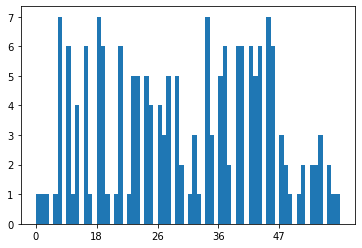

In [142]:
plt.hist(age, bins = 70)

x_ticks = np.arange(0, 50, 10)
plt.xticks(x_ticks)
plt.show()